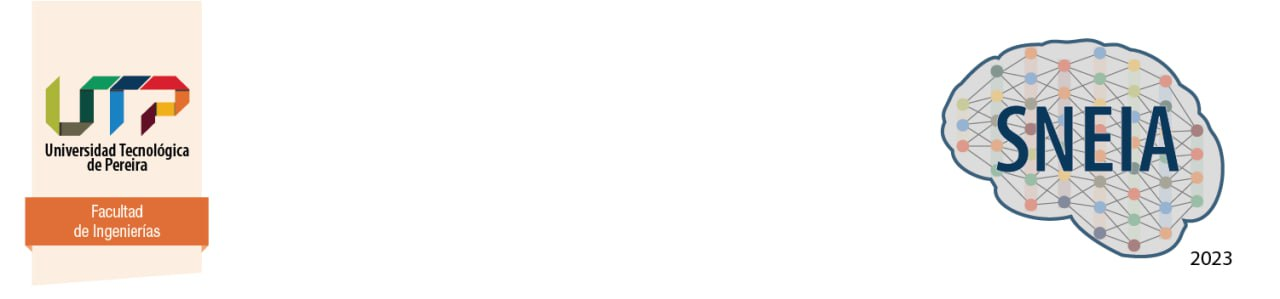

<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/4_NoSupervisado/1_ConglomeradosNosupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado

## Conglomerados (Clustering)

- Se presentan los conceptos básicos de aprendizaje no supervisado mediante nociones de disimilitud y similitud.

In [ ]:
from sklearn.datasets import load_iris  # importamos la función load_iris del módulo sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()  # no requiere ningún parámetro porque ya están todos por defecto
X    = data.data  # accedemos a la propiedad data de la función load_iris()
y    = data.target  # accedemos a la propiedad target de la función load_iris()
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Ejemplo:** Consideremos el conjunto de datos *iris dataset*, donde la especie (clase) de cada instancia (muestra) se representa con un marcador diferente:

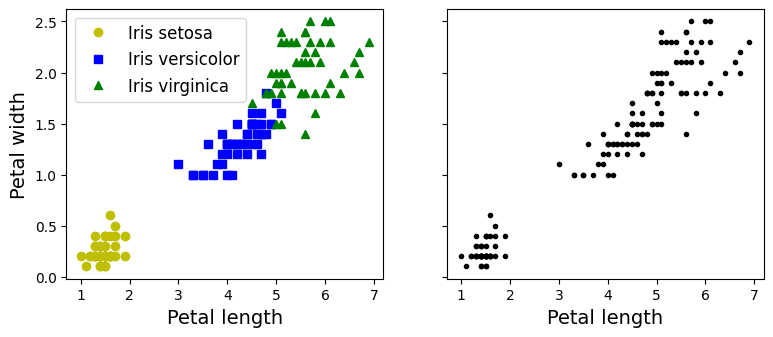

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")  # Diagrama de dispersión
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False) # desactiva los valores en el eje y

#save_fig("classification_vs_clustering_plot")
plt.show()

- **Figura de la izquierda:** Es un conjunto de datos etiquetado, para el cual los algoritmos de clasificación como Regresión logística, SVM o clasificadores de bosque aleatorio son muy adecuados.
- **Figura de la derecha:** Tenemos el mismo conjunto de datos, pero sin las etiquetas, por lo que ya no puede usar un algoritmo de clasificación.

- Los algoritmos de conglomerados (clustering) buscan extraer grupos homogeneos de datos usando solo las características de entrada. En otras palabras los algoritmos de clustering no tienen información sobre los datos de entrenamiento, como la clasificación o la etiqueta que se desea predecir, sino que se centran exclusivamente en la información contenida en las características de entrada.

  El objetivo del clustering es encontrar grupos o clusters de datos que sean lo más homogéneos posible dentro del mismo grupo, y lo más diferentes posible entre diferentes grupos.

- **NOTA:** No existe una definición universal de lo que es un *clúster*: realmente depende del contexto, y diferentes algoritmos capturarán diferentes tipos de clústeres.


## K-means

**Ejemplo:** Consideremos un conjunto de datos sin etiqueta representado por $5$ *blobs* de instancias/muestras.

In [ ]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])                  # desviación estándar de cada blob
X, y     = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)         # en X se guardan las coordenadas de cada punto
                                                                # en y se guardan las etiquetas, es decir, a qué blob pertenece

Ahora observemos los *blobs*:

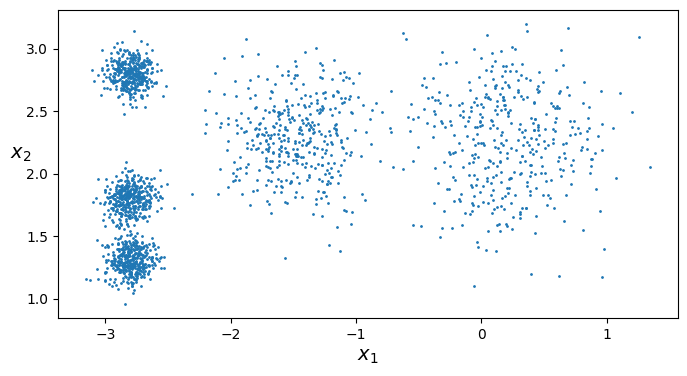

In [ ]:
def plot_clusters(X, y=None):               # "None" porque no se quiere asignar un color a las diferentes etiquetas de los clusters
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1) # Gráfico de dispersion, s=tamaño de puntos
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

### Ajuste y predicción

- Vamos a entrenar un *clustering K-Means* en este conjunto de datos.

- **Intentaremos encontrar el centro de cada *blob* y asignar cada instancia al *blob* más cercano**:

Específicamente el algoritmo KMeans realiza los siguiente pasos:

1. Inicialización: Selecciona aleatoriamente 'K' puntos del conjunto de datos como centroides iniciales, donde 'K' es el número de clústeres deseado.
2. Asignación: Asigna cada punto en el conjunto de datos al centroide más cercano, formando así clústeres.
3. Actualización: Calcula los nuevos centroides de cada clúster como la media de todos los puntos asignados a ese clúster.
4. Repetición: Repite los pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.

In [ ]:
from sklearn.cluster import KMeans                    # importamos la clase KMeans del módulo cluster de la librería scikit-learn
k      = 5                                            # numero de clusters
kmeans = KMeans(n_clusters=k, random_state=42)        # se establece una semilla (valor del estado aleatorio)
y_pred = kmeans.fit_predict(X)                        # se ajusta el modelo al conjunto de datos X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- Tengamos en cuenta que debemos especificar el número de clústeres $k$ que debe encontrar el algoritmo.

- En este caso, cada instancia fue asignada a uno de los 5 grupos.

- En el contexto de la agrupación, **la etiqueta de una instancia es el índice de la agrupación a la que el algoritmo asigna esta instancia**.

- No debe confundirse con las etiquetas de clase en clasificación. En clasificación, las etiquetas indican a qué clase pertenece cada instancia, mientras que en la agrupación, las etiquetas se utilizan para indicar a qué grupo pertenece cada instancia.


Podemos echar un vistazo a los 5 centroides que encontró el algoritmo:

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Por supuesto, podemos asignar fácilmente nuevas instancias al clúster cuyo centroide es el más cercano:

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### Fronteras de decisión

Tracemos los **límites de decisión del modelo**. Esto nos da un *diagrama de Voronoi*:

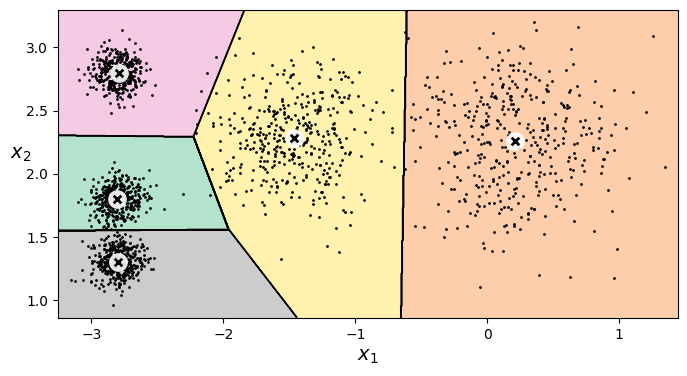

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10] # se establece un umbral para dejar pasar solo los centroides con mayor peso
                                                            # multiplicando la matriz centroids por una matriz booleana
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1          # valor minimo de cada una de las dos columnas
    maxs = X.max(axis=0) + 0.1          # valor maximo de cada una de las dos columnas
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), # np.linspace para puntos igualmente espaciados y le entra ("x" minimo, "x" maximo, #puntos)
                         np.linspace(mins[1], maxs[1], resolution)) # np.linspace para puntos igualmente espaciados y le entra ("y" minimo, "y" maximo, #puntos)
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]) # predice a que cluster pertenece cada punto de la cuadricula (diferentes a los "puntos" de entrada)
                                                         # ravel y c_ es para aplanarlos y concatenarlos
    Z = Z.reshape(xx.shape)             # para poder graficar a Z junto con xx e yy y mostrar asi las regiones de decision

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")           # grafico de contorno relleno
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k') # grafico de contorno (lineas)
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)  # se etiqueta el eje x
    else:
        plt.tick_params(labelbottom=False)  # de lo contrario se omite el eje x
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0) # se etiqueta el eje y
    else:
        plt.tick_params(labelleft=False)  # de lo contrario se omite el eje y

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X) # se especifican solo dos parametros quedando los demas por defecto
#save_fig("voronoi_plot")
plt.show()

- La gran mayoría de las instancias estan claramente asignadas al grupo apropiado, **pero algunas instancias probablemente estaban mal etiquetadas** (especialmente cerca del límite entre el grupo superior izquierdo y el grupo central).
- De hecho, el algoritmo **K-Means no se comporta muy bien cuando los *blobs* tienen diámetros muy diferentes**, ya que lo único que le importa al asignar una instancia a un clúster es la distancia al centroide.

### Hard Clustering vs Soft Clustering

- En lugar de asignar cada instancia a un solo clúster, lo que se denomina *hard clustering*, puede ser útil **asignar a cada instancia una puntuación por agrupación**: esto se denomina *soft clustering*.

- **Ejemplo:** el puntaje puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser un puntaje de similitud (o afinidad) como la Función de Base Radial Gaussiana. En la clase *KMeans*, el método *transform()* mide la distancia desde cada instancia a cada centroide:

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### K-Means

**El algoritmo en acción:**

- La clase *KMeans* aplica un algoritmo optimizado por defecto. Para obtener el algoritmo K-Means original (solo con fines educativos), debe establecer *init="random"*, *n_init = 1* and *algorithm="full"*. Estos hiperparámetros se explicarán a continuación.

- Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver **cómo se mueven los centroides**:

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

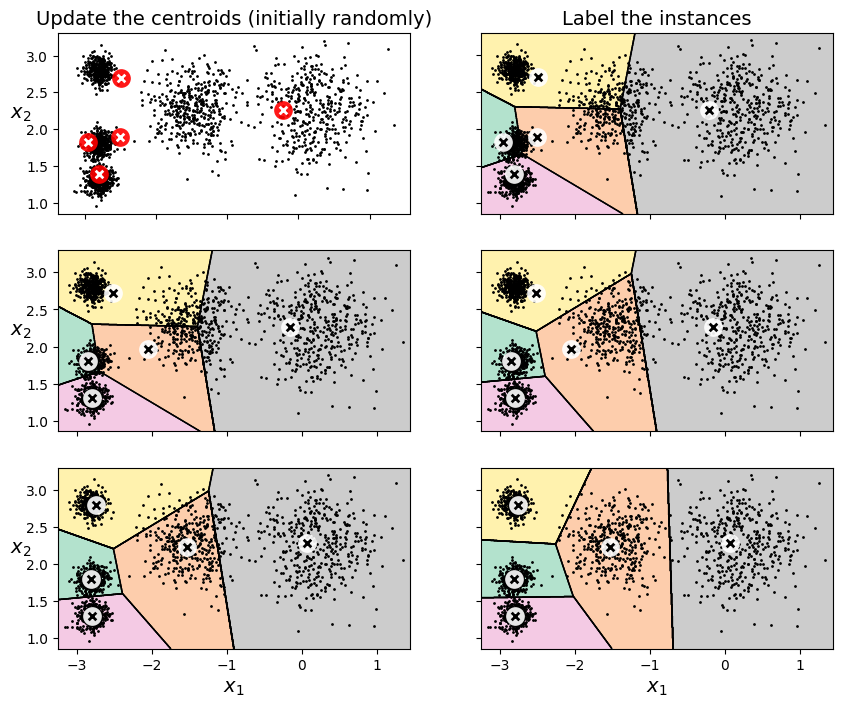

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

- Podemos ver el algoritmo en acción en la Figura anterior, los centroides se inicializan aleatoriamente (arriba a la izquierda).
- Luego las instancias se etiquetan (arriba a la derecha).
- Luego los centroides se actualizan (centro a la izquierda).
- Seguido, las instancias se vuelven a etiquetar (centro a la derecha ), y así.

- **NOTA:** La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias, el número de clústeres $k$ y el número de dimensiones.

- Sin embargo, esto solo es cierto cuando los datos tienen una estructura de agrupamiento. Si no es así, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el número de instancias.

### Variabilidad K-Means

**Ejemplo:** la siguiente Figura muestra dos soluciones subóptimas con las que el algoritmo puede converger si no tiene suerte con el paso de inicialización aleatoria:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


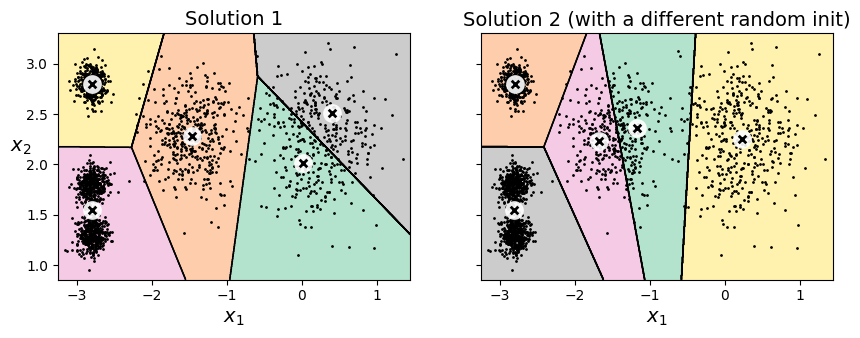

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=190)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

#plt.savefig("kmeans_variability_plot")
plt.show()

**Veamos algunas formas en que puede mitigar este riesgo mejorando la inicialización del centroide.**

### Métodos de inicialización de centroides

Si sabemos aproximadamente dónde deberían estar los centroides (por ejemplo, si ejecutó otro algoritmo de agrupación anteriormente), puede establecer el hiperparámetro *init* en una matriz NumPy que contiene la lista de centroides y establecer *n_init* en 1:

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans    = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

- Otra solución es **ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y retonar la mejor solución**.

- Esto se controla mediante el hiperparámetro *n_init*: de forma predeterminada, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente se ejecuta 10 veces cuando se llama al método *fit()*, y Scikit-Learn mantiene la mejor solución.

- Pero, **¿cómo sabe exactamente cuál solución es la mejor?**

- K-means utiliza una métrica de rendimiento llamada *inercia del modelo*: distancia cuadrática media entre cada instancia y su centroide más cercano. (entre mas baja la inercia, mejor)

In [ ]:
kmeans.inertia_

211.5985372581684

- El método *score()* devuelve la inercia negativa. ¿Por qué negativo? **porque el método *score()* de un predictor siempre debe respetar la regla, a mayor valor mejor**.

In [ ]:
kmeans.score(X)

-211.59853725816836

### Múltiples inicializaciones

- Un enfoque para resolver el problema de la variabilidad es **simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la solución que minimice la inercia**.

- **Ejemplo:** tenemos las inercias de los dos modelos *"malos"* que se muestran en la figura anterior:

In [ ]:
kmeans_rnd_init1.inertia_

223.2910857281903

In [ ]:
kmeans_rnd_init2.inertia_

237.0044043335294

- Cuando configuramos el hiperparámetro *n_init*, Scikit-Learn ejecuta el algoritmo original *n_init* veces y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece *n_init = 10*.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=10,
       random_state=11)

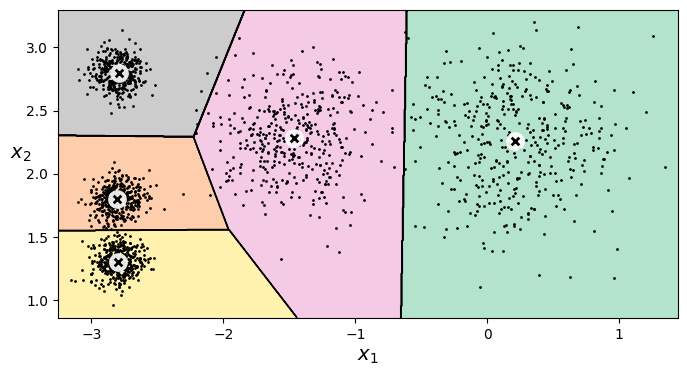

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### Mini-Batch K-Means

- Implementación de K-means por lotes.

La clase MiniBatchKMeans es una implementación del algoritmo de clustering KMeans que utiliza un método de mini lotes (en lugar de lotes completos) para acelerar el proceso de clustering en grandes conjuntos de datos.




In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

- Si el conjunto de datos no cabe en la memoría RAM, la opción más simple es usar la clase *memmap*.

- **Ejemplo:** Primero carguemos la base de datos de dígitos escritos a mano MNIST:

In [ ]:
import urllib # para trabajar con URL y descargar archivos
import os # para trabajar con el sistema operativo y archivos
from sklearn.datasets import fetch_openml # importamos la funcion feth_... desde el modulo sklearn.datasets

mnist        = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64) # se convierte el target en un entero de 64bits

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)  #mnist e sun diccionario que tiene dos claves que contienen las imagenes y las etiquetas


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- A continuación, escribámoslo en un *memmap*:

In [ ]:
from tempfile import mkdtemp  # para crear un directorio temporal en el sistema de archivos
import os.path as path        # proporciona funciones para trabajar con rutas de archivos y directorios
filename = path.join(mkdtemp(), 'my_mnist.data')  # se crea una ruta de archivo temporal para almacenar los datos del conjunto de entrenamiento
X_mm     = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)# se crea un objeto np.memmap para almacenar los datos del conjunto de entrenamiento MNIST en memoria.
X_mm[:]  = X_train  # se copian los datos del conjunto de entrenamiento MNIST en la matriz de memoria mapeada

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

- Si nuestros datos son tan grandes que no puede usar *memmap*, las cosas se vuelven más complicadas.

- Comencemos escribiendo una función para cargar el próximo lote (en la vida real, cargaría los datos desde disco duro):

Vamos a cargar un lote aleatorio de muestras del conjunto de datos X

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- Ahora podemos entrenar al modelo al alimentarlo un batch a la vez.

- También necesitamos implementar múltiples inicializaciones y mantener el modelo con la menor inercia:

(Depende del tiempo)

In [ ]:
np.random.seed(42)  # para que los datos sean reproducibles

k            = 5    # numero de clusteres
n_init       = 10   # numero de inicializaciones aleatorias que se deben probar para encontrar la mejor solución.
n_iterations = 100  # número de iteraciones que se deben realizar en cada inicialización.
batch_size   = 100  # tamaño del datos para actualizar los centroides. (predeterminado: 100)
init_size    = 500  # tamaño del datos para seleccionar los centroides. (predeterminado: 3*batch_size)

evaluate_on_last_n_iters = 10 # número de iteraciones finales en las que se debe evaluar la inercia del modelo.

best_kmeans = None  # se utilizará para almacenar el mejor modelo de clustering encontrado.

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init=3) # se utiliza el modelo de clustering MiniBatchKMeans para entrenar cada inicialización
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)  # se ajusta el modelo con este lote seleccionando una inicializacion (o centroides)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch) # se ajusta el modelo de clustering a este lote
        if iteration >= n_iterations - evaluate_on_last_n_iters:  # verifica si la iteracion actual es una de las ultimas evaluate_... iteraciones
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_  # la suma de la inercia del modelo en las últimas iteraciones se utiliza para evaluar la calidad del modelo en su conjunto.

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):  # best_kmeans se actualiza cada vez que se encuentra un modelo con una inercia más baja que la del mejor modelo encontrado hasta ese momento
        best_kmeans = minibatch_kmeans

best_kmeans.score(X)  #score en KMeans es el valor negativo de la incercia, entre más alta mejor

-211.62571878891146

**Mini-batch K-Means es mucho más rápido que los K-Means normales**:

In [ ]:
%timeit KMeans(n_clusters=5, n_init=10).fit(X) # para medir el tiempo de ejecución de la función fit() del algoritmo KMeans con un número de clusters igual a 5 y con los datos de entrada X


27.7 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit MiniBatchKMeans(n_clusters=5,n_init=3).fit(X)

16.6 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


- **¡Eso es mucho más rápido!** Sin embargo, su rendimiento es a menudo más bajo (mayor inercia), y se sigue degradando a medida que aumenta $k$.

- Tracemos la relación de inercia y la relación de tiempo de entrenamiento entre K-Means Mini-batch y K-Means regulares:

(Depende del tiempo)

In [ ]:
from timeit import timeit

# se crean matrices variaz para almacenar los tiempos e inercias de ambos algoritmos para cada valor de k
times    = np.empty((25, 2))
inertias = np.empty((25, 2))
for k in range(1, 26):
    kmeans_          = KMeans(n_clusters=k, random_state=42, n_init=10)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=3)
    print("\r{}/{}".format(k, 25), end="")
    times[k-1, 0]    = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]    = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

25/25

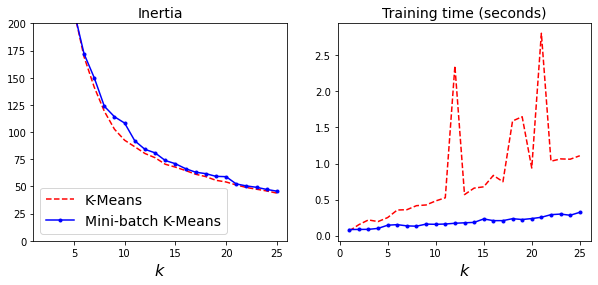

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 26), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 26), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 26, 0, 200])

plt.subplot(122)
plt.plot(range(1, 26), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 26), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
#plt.axis([1, 26, 0, 25])

#save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

# Cómo encontrar el número de grupos?

- **Ejemplo:** como podemos ver a continuación, establecer $k$ en 3 o 8 da como resultado modelos bastante malos:

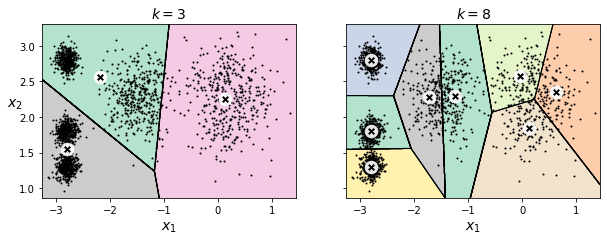

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_k8 = KMeans(n_clusters=8, random_state=42, n_init=10)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()

- **TIP:** Quizás estemos pensando que podríamos **elegir el modelo con la menor inercia**.

- **Respuesta:** Lamentablemente, no es tan simple. La inercia no es una buena medida de rendimiento cuando se trata de elegir $k$, ya que sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos más grupos haya, más cerca estará cada instancia de su centroide más cercano.

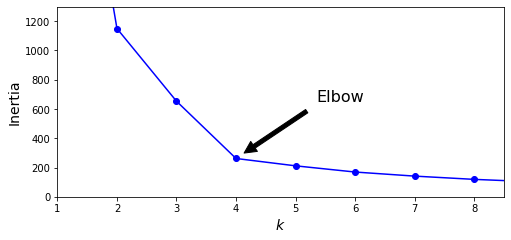

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)  # crea una lista de modelos KMeans ajustados (entrenados) para diferentes valores de 'k'
                for k in range(1, 10)]
inertias     = [model.inertia_ for model in kmeans_per_k]     # lista con inercia para cada modelo de K-means del paso anterior

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',                           # anotacion del codo en el grafico
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])                     # limites de los ejes
#save_fig("inertia_vs_k_plot")
plt.show()

- Como podemos ver, la inercia cae muy rápidamente a medida que aumentamos $k$ hasta 4, pero luego disminuye mucho más lentamente a medida que seguimos aumentando $k$.
- Esta curva tiene aproximadamente la forma de un brazo, y hay un "*codo*" en $k = 4$, por lo que si no lo supiéramos mejor, sería una buena opción: cualquier valor más bajo sería dramático, mientras que cualquier valor más alto no ayudaría mucho.

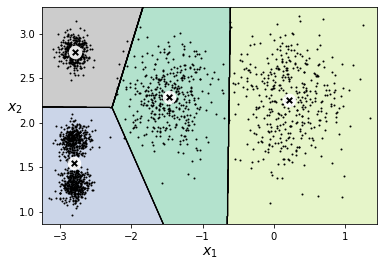

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)  # [4-1] se utiliza para seleccionar el modelo en la posicion 3, porque en python se enumera desde 0
plt.show()

- Una altenativata a la inercia, es el *silhouette score*. El coeficiente de silueta mide qué tan bien se agrupan las instancias y cuán separadas están las agrupaciones entre sí.

Tracemos la puntuación de la silueta en función de $k$:

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)   #  kmeans.labels = y_predict

0.655517642572828

Comparemos los puntajes de silueta para diferentes números de grupos:

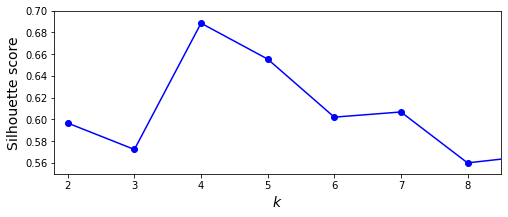

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] # El coeficiente de silueta no se puede calcular para un solo cluster

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

- Como podemos ver, aunque **confirma que $k = 4$ es una muy buena opción, también subraya el hecho de que $k = 5$ también es bastante bueno y mucho mejor que $k = 6$ o $k = 7$**.

Adicionalmente, obtenemos una visualización aún más informativa cuando trazamos el *silhouette score* de cada instancia, ordenado por el grupo al que están asignados y por el valor del coeficiente (**diagrama de silueta**):

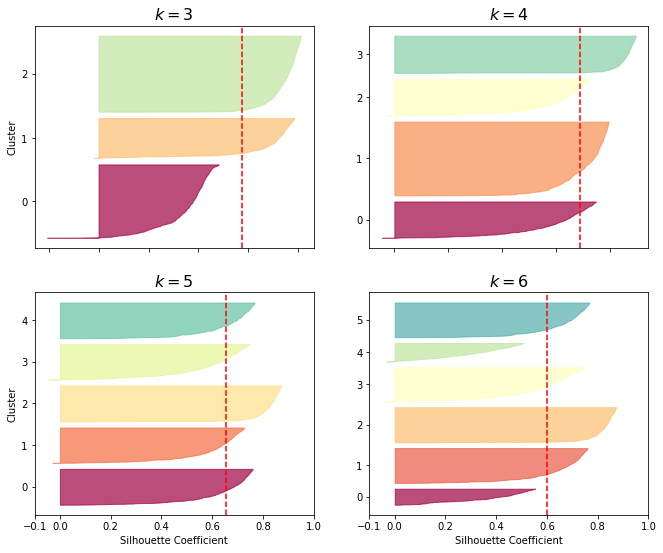

In [ ]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)                    # crea un sub-grafico en la posicion k-2

    y_pred                  = kmeans_per_k[k - 1].labels_   # extrae las etiquetas de los clusteres para k de kmeans_per_k
    silhouette_coefficients = silhouette_samples(X, y_pred) # calcula los coeficientes de silueta

    padding = len(X) // 30  # calcula el espacio vertical para cada cluster en el grafico
    pos     = padding       # establece la posicion inicial para dibujar el primer cluster
    ticks   = []            # lista para almacenar las posiciones de los ejes y
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]       # extrae todos los coeficientes de silueta para todas las muestras en el cluster i
        coeffs.sort()       # ordena los coeficientes

        color = mpl.cm.Spectral(i / k)                                    # asigna color
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,   # asigna relleno
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)                # agrega la posicion media de cada cluster, para que se muestre el numero correcto de clusteres
        pos += len(coeffs) + padding                        # actualiza la posicion vertical para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))  # gca obtiene el objeto Axes. Se establecen los ticks en el eje y. FixedLocator toma una lista de valores y los utiliza como ubicaciones para los ticks
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k))) # establece el formateador de ticks para que estos se muestren con etiquetas de texto
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")  # dibuja raya vertical indicando coeficiente medio
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

- Las líneas discontinuas verticales representan el *silhouette score* por grupo.
- Cuando la mayoría de las instancias en un grupo tienen un coeficiente más bajo que este puntaje (es decir, si muchas de las instancias se detienen cerca de la línea punteada, terminando a la izquierda de la misma), entonces **el grupo es bastante malo, sus instancias están demasiado cerca de otros grupos**.
- Podemos ver que cuando $k = 3$ y cuando $k = 6$, obtenemos grupos defectuosos. Pero cuando $k = 4$ o $k = 5$, los grupos se ven bastante bien: **la mayoría de los casos se extienden más allá de la línea discontinua, a la derecha y más cerca de 1.0**.
- Cuando $k = 4$, el grupo en el índice 1 (el tercero desde la parte superior), es bastante grande, mientras que cuando $k = 5$, todos los grupos tienen tamaños similares, por lo que a pesar de que la puntuación de silueta general de $k = 4$ es ligeramente mayor que para $k = 5$, parece una buena idea usar $k = 5$ para obtener **grupos de tamaños similares**.

### Consideraciones sobre K-Means

**Ejemplo:** la Figura a continuación muestra cómo KMeans agrupa un conjunto de datos que contiene tres grupos elipsoidales de diferentes dimensiones, densidades y orientaciones:

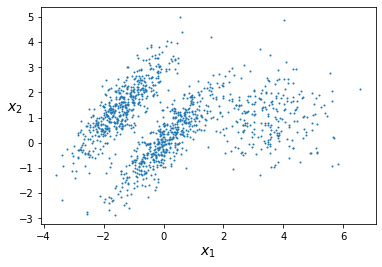

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1     = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))  # transformacion lineal multiplicando por una matriz
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)  # centers=1 genera un centro aleatorio
X2     = X2 + [6, -8] # se mueve el centro del blob
X      = np.r_[X1, X2]  # se concatenan los centros
y      = np.r_[y1, y2]  # se concatenan las etiquetas

plot_clusters(X)

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad  = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

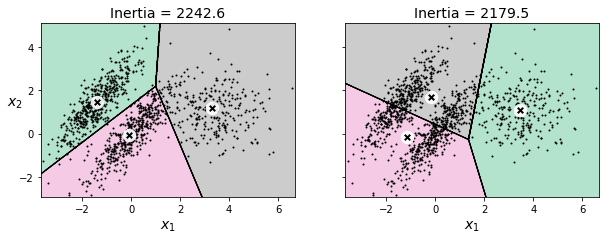

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_plot")
plt.show()

Como podemos ver, **ninguna de estas soluciones es buena**.

- La solución a la izquierda es mejor, pero aún corta el $25\%$ del grupo intermedio y lo asigna al grupo a la derecha.
- La solución a la derecha es simplemente terrible, a pesar de que su inercia es menor.

Entonces, dependiendo de los datos, los diferentes algoritmos de agrupación pueden funcionar mejor. Por ejemplo, en estos tipos de grupos elípticos, los **modelos de mezcla gaussiana** funcionan muy bien.

**TIP:** Es importante **escalar las características de entrada antes de ejecutar K-Means**, de lo contrario, los grupos pueden estar muy extendidos y K-Means funcionará mal. Escalar las características no garantiza que todos los clústeres sean agradables y esféricos, pero generalmente mejora las cosas.


## Aplicación #1: Segmentación de imágenes

Aquí, vamos a hacer algo mucho más simple: **segmentación de color**. Simplemente asignaremos píxeles al mismo segmento si tienen un color similar. Primero, carguemos la imagen usando la función *imread()* de Matplotlib:

In [ ]:
FILEID = "1BlSBya5x9Jsd1Bu-6PPwMehdPQgAkX0w"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O ladybug.png && rm -rf /tmp/cookies.txt
#wget descarga una imagen de la web

--2023-03-24 23:55:37--  https://docs.google.com/uc?export=download&confirm=&id=1BlSBya5x9Jsd1Bu-6PPwMehdPQgAkX0w
Resolving docs.google.com (docs.google.com)... 142.250.141.101, 142.250.141.138, 142.250.141.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lsmpl3aslmu2nig3dqailfa9ka22p52u/1679702100000/00053843418029901611/*/1BlSBya5x9Jsd1Bu-6PPwMehdPQgAkX0w?e=download&uuid=66501a43-8f1a-45e0-aeff-890d02e0f01e [following]
--2023-03-24 23:55:38--  https://doc-04-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lsmpl3aslmu2nig3dqailfa9ka22p52u/1679702100000/00053843418029901611/*/1BlSBya5x9Jsd1Bu-6PPwMehdPQgAkX0w?e=download&uuid=66501a43-8f1a-45e0-aeff-890d02e0f01e
Resolving doc-04-94-docs.googleusercontent.com (doc-04-94-docs.googleusercontent.com)... 142.250.101.1

(533, 800, 3)

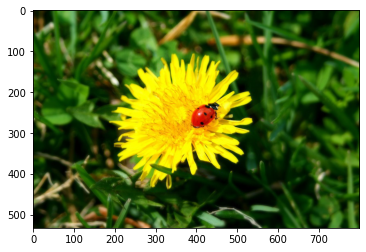

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join("ladybug.png")) #Guardar imagen descargada en "image" en forma de una matriz cubica, la matriz existe 3 veces, una vez para cada color del RGB
plt.imshow(image)
image.shape #Mostrar imagen junto a su resolucion,

La imagen se representa como una **Matriz Cubica**, donde los elementos del vector representan:
-La altura
- El ancho
- El número de canales de color, en este caso rojo, verde y azul (RGB).

En otras palabras, tenemos 3 matrices de 533 x 800, donde cada una representa la intensidad de su color en un pixel especifico (entre 0 y 255).

- Algunas imágenes pueden tener menos canales, como imágenes en escala de grises (un canal), o más canales, como imágenes de satélite que a menudo contienen canales para muchas frecuencias de luz (por ejemplo, infrarrojos).

El siguiente código da nueva forma a la matriz para obtener una larga lista de colores RGB, luego agrupa estos colores usando K-Means.


linea [1]: el código utiliza la función reshape de NumPy para cambiar la forma de la imagen de entrada image. La imagen se reorganiza en una matriz de dos dimensiones, donde cada fila representa un píxel y cada columna representa un canal de color (rojo, verde y azul). La opción "-1" en la primera dimensión indica que NumPy debe determinar automáticamente la longitud de esa dimensión basándose en la longitud de la matriz original.

linea [3]:  Se utiliza la propiedad cluster_centers_ del objeto KMeans para obtener los centros de los clusters. Luego, se indexa esta matriz de centros de clusters utilizando la propiedad labels_ del objeto KMeans. Esta propiedad contiene la asignación del cluster de cada píxel de la imagen. Por lo tanto, la matriz de centros de clusters se utiliza para reemplazar cada píxel de la imagen con el centro de cluster al que se asigna. El resultado es una nueva matriz de píxeles que representa la imagen segmentada.

En resumen, la función KMeans se utiliza para identificar los centros de los clusters y asignar cada pixel de la imagen a un cluster en particular. Luego, estos centros de clusters se utilizan para reemplazar cada pixel de la imagen con el centro de cluster correspondiente, generando así una nueva matriz de píxeles que representa la imagen segmentada

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


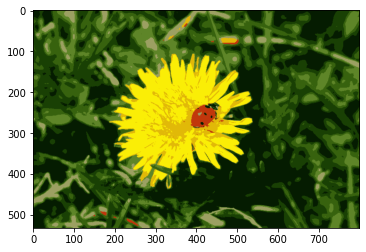

In [ ]:
X             = image.reshape(-1, 3)
# Convierte la matriz 3D (n*n*n) a 2D (n*n), pero conservando todos los pixeles de la imagen
# La nueva matriz tendra un tamaño de (533*800, 3) o (426.400, 3)
# Las filas representan cada pixel de la imagen y cada columna un color del RGB de (0 a 255)

kmeans        = KMeans(n_clusters=8, random_state=42).fit(X)
# Decidimos en cuantos colores vamos a segmentar la imagen
# Le damos una semilla para su posible futura reproduccion
# Mediante el metodo "fit()" le decimos que aplique el modelo a la imagen de la mariquita

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# "kmeans.cluster_centers_" es una matriz que contiene la ubicacion de cada centroide con relacion al RGB, como decidimos que fueran 8 centroides esta matriz sera de (8, 3)
# "kmeans.labels_" es una matriz del mismo tamaño que la imagen que contiene a que cluster se asigno cada pixel de la imagen
#  Por lo tanto en "segmented_img" estariamos guardando la misma imagen original pero con todos sus pixeles remplazados por los colores representativos de cada cluster

segmented_img = segmented_img.reshape(image.shape)
# Retornamos la imagen a su tamaño original de matriz cubica, para que pueda ser interpretada normalmente

plt.imshow(segmented_img)
#Mostramos la imagen segmentada en 8 colores en pantalla

Podemos experimentar con varios números de grupos, como se muestra en la siguiente figura.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

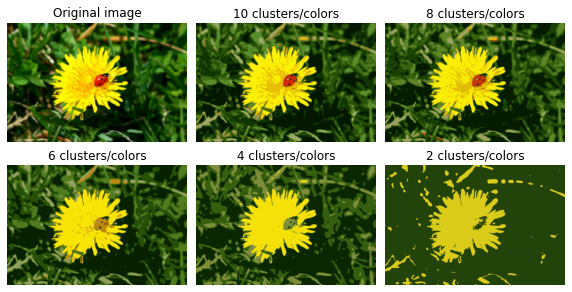

In [ ]:
segmented_imgs = []
# Convertimos la variable donde estabamos guardando la imagen anterior en una lista, para poder guardar varias de estas imagenes

n_colors       = (10, 8, 6, 4, 2)
# Distintos clusters para probar el como cambia la imagen con menos colores

for n_clusters in n_colors:
    kmeans        = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
# Repetimos el algoritmo anterior en un ciclo cambiando cada vez la cantidad total de clusters o en este caso clusters


#Codigo para mostrar las imagenes que no voy a explicar :)
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx]) # Acceder a la lista donde estan guardadas las imagenes que ya se les realizo segmentacion
    plt.title("{} clusters/colors".format(n_clusters))
    plt.axis('off')
plt.show()

## Aplicación #2: Clustering como preprocesamiento de datos

**Disimilitud:** es una medida que se utiliza para evaluar la diferencia entre 2 elementos o instancias de un conjunto de datos. Se utiliza para agrupar instancias similares juntas en un mismo cluster. Dos instancias que sean muy similares tendrán una disimilitud pequeña entre ellas, mientras que dos instancias que sean muy diferentes tendrán una disimilitud grande.

Este tipo de medidas se tiende a llamar "distancia", entre mas similares sean 2 datos mas "cerca" estaran el uno del otro, mientras mas diferentes sean mas "lejos" estaran el uno del otro.

- Vamos a utilizar el clustering como una tecnica para reducir la dimensionalidad de una base de datos (Reducir la cantidad de variables, sin perder informacion) para asi **mejorar los resultados de un posible algoritmo de aprendizaje supervisado**

- **En el ejemplo** utilizaremos el conjunto de datos de dígitos, que es un conjunto de imágenes de dígitos escritos a mano en escala de grises

Vamos entonces a hacer una prueba de **aprendizaje supervisado** sin pasar antes por el preprocesamiento del clustering, recordemos que el aprendizaje supervisado requiere los datos y las etiquetas para esos mismos datos

In [ ]:
from sklearn.datasets import load_digits
#Descargar base de datos

X_digits, y_digits = load_digits(return_X_y=True)
# load_digits es una funcion que guarda la base de datos en las variables dadas
# El parametro de la funcion indica que no solo descargue las imagenes de la base de datos sino tambien las etiquetas, sin este parametro solo descargaria las imagenes.

# X_digits es una matriz de forma (1797, 64), que contiene 1797 imágenes de dígitos, cada una con 64 píxeles.
# y_digits es un vector de forma (1797, 1), que contiene las etiquetas de los 1797 dígitos representados en X_digits.



Ahora vamos a dividir la base de datos en 2 grupos, el grupo de entrenamiento y el grupo de pruebas, en una proporcion de (75% / 25%)

In [ ]:
from sklearn.model_selection import train_test_split
# Importar funcion de division de datos

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)
len(X_train)
# Dividir los datos en base a la semilla dada, mientras se le de la misma semilla los datos siempre se dividiran de la misma manera

1347

A continuación, ajustemos un modelo de **Regresión logística**:

In [ ]:
from sklearn.linear_model import LogisticRegression
# Importamos la clase "LogisticRegression" para posteriormente crear un objeto en base a esta

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
# Vamos a crear un objeto de la clase "LogisticRegression" que es un modelo de aprendizaje supervisado que se utiliza para la clasificación de elementos, parametros:
# MULTI_CLASS: Especificarle al modelo que vamos a trabajar con varias clases, en este caso 10 por los digitos del 0 al 9.
# SOLVER: Especificamos el solucionador que encontrara los coeficientes que daran solucion al problema, "lbfgs" es especialmente bueno para bases de datos pequeñas
# MAX_ITER = La cantidad de iteraciones basicas es 100, aumentamos este valor a 5000 debido a que estamos trabajando con imagenes que son tipos de datos bastante robustos

log_reg.fit(X_train, y_train)
# Le pasamos los datos de entrenamiento al modelo
# Mediante el metodo "fit" ejecutamos el entrenamiento

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

Mediante los datos de pruebas que habiamos separado anteriormente vamos a probar el modelo que entrenamos, y con el metodo **score()** sabremos que tan bien clasifica los datos nuestro modelo.

In [ ]:
log_reg.score(X_test, y_test)

0.9688888888888889

Bien, esa es nuestro resultado sin usar preprocesamiento por clustering: **96.8% de acierto**.

- Veamos si podemos mejorar utilizando el algoritmo de conglomerados **Kmeans** como un paso de preprocesamiento. Crearemos la siguiente linea de trabajo que:
    1. Primero agrupará el conjunto de entrenamiento en 50 grupos (Reduccion de dimensionalidad)
    2. Luego, reemplazaremos las imágenes con sus distancias a estos 50 grupos (**Nuevas características de disimilitud**).
    3. Por último, aplicaremos un modelo de regresión logística.

**NOTA:** Aunque es tentador definir el número de grupos a 10, dado que hay 10 dígitos diferentes, es poco probable que funcione bien, porque **hay varias formas diferentes de escribir cada dígito**.

In [ ]:
from sklearn.pipeline import Pipeline
# Importamos la clase para crear lineas de trabajo

# Creamos una linea de trabajo donde los datos que le entren primero pasaran por Kmeans (Clusterizacion y reduccion de dimensiones) y luego de nuevo por el modelo de LogReg
# Misma configuracion*
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

# Pasamos los datos de entrenamiento a la linea de trabajo.
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

Ahora vamos a evaluar el rendimiento esta linea de trabajo:

In [ ]:
pipeline.score(X_test, y_test)

0.9777777777777777

Finalmente, podemos ver que mejoramos nuestros resultados por casi un punto :^)

- Sin embargo, elegimos el número de clústeres $k$ de forma arbitraria, seguramente podemos hacerlo mejor.
- Dado que K-Means es solo un paso de preprocesamiento en el *pipeline* de clasificación, encontrar un buen valor para $k$ es mucho más simple que antes: no es necesario realizar un análisis de silueta o minimizar la inercia, el mejor valor de $k$ es simplemente el uno que resulte en el mejor rendimiento de clasificación.
Usemos *GridSearchCV* para encontrar la cantidad óptima de clústeres:

In [ ]:
# El siguiente código puede tardar varios minutos en ejecutarse (5 min)
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100,2))
grid_clf   = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             n_jobs=2, param_grid={'kmeans__n_clusters': range(2, 100, 2)},
             verbose=2)

Para ver el mejor valor de $k$ y el rendimiento del *pipeline* resultante:

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 88}

In [ ]:
grid_clf.score(X_test, y_test)

0.9822222222222222

Finalmente podemos ver que el mejor resultado que podemos alcanzar es de **98.2%** mediante el uso de 86 clusters.

## Aplicación #3: Aprendizaje semi-supervisado basado en conglomerados

- Otro caso de uso para clustering es en el aprendizaje semi-supervisado **cuando tenemos muchas instancias sin etiquetar y muy pocas instancias etiquetadas**.

- Vamos a entrenar un modelo de regresión logística en una muestra de 50 instancias etiquetadas del conjunto de datos de dígitos, es decir, un 4%:

In [ ]:
n_labeled = 50
# Cantidad de instancias con etiquetas

log_reg   = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
# Diseñamos el modelo con los mismos parametros anteriores

log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
# Hacemos el entrenamiento del modelo unicamente con las instancias etiquetadas

LogisticRegression(multi_class='ovr', random_state=42)

¿Cuál es el rendimiento de este modelo en el conjunto de prueba?

In [ ]:
log_reg.score(X_test, y_test)

0.8333333333333334

- El acierto es solo del $83.3\%$: debido a que solo usamos un $4\%$ de la base de datos

- Veamos cómo podemos hacerlo mejor:
    1. Agrupemos el conjunto de entrenamiento en 50 grupos (La cantidad de datos que tenemos etiquetados)
    2. Para cada grupo, busquemos la imagen más cercana al centroide. (La imagen mas representativa de un grupo) Llamaremos a estas imágenes, instancias representativas (**Prototipos**).

In [ ]:
k                        = 50
# Definimos la cantidad de clusters

kmeans                   = KMeans(n_clusters=k, random_state=42)
# Definimos un objeto Kmeans con la cantidad de clusters dada

X_digits_dist            = kmeans.fit_transform(X_train)
# Creamos una matriz con la distancia de cada dato de X_train(1347) a cada uno de los clusters definidos (50), por lo que tendriamos una matriz de dimension (1347, 50)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# Esta variable es un array de tamaño 50 que contiene los indices de cuales son los datos mas cercanos a cada cluster, es decir, el dato que escogeremos para representar cada cluster
# El metodo argmin identifica el valor minimo de cada columna de la matriz, por lo tanto identifica el valor mas cercano al cluster

X_representative_digits  = X_train[representative_digit_idx]
# Mediante la lista de indices que acabamos de crear extraemos los datos especificos de la database que seran los representantes de los clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ahora tracemos estas imágenes representativas y rotúlemoslas manualmente:

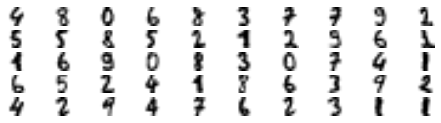

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
# Recorremos la matriz donde estan los numeros que mas cerca estuvieron de su respectivo cluster

plt.show()

In [ ]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1
    ])

Ahora tenemos un conjunto de 50 clusters representativos de los datos. Esto nos permitirá una mayor efectividad al momento de medir la similitud o "distancia" de los datos con respecto a estos centroides.

Vamos a aprovechar esta mejora que hicimos en los centroides **para tener un mejor aprendizaje no supervisado**

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
# Definimos un objeto de la clase "LogisticRegression" con la misma configuracion que venimos usando

log_reg.fit(X_representative_digits, y_representative_digits)
# Entrenamos el modelo con los datos representativos que identificamos gracias a Kmeans

log_reg.score(X_test, y_test)
# Provemos de nuevo el modelo con los centroides "mejorados"

0.9222222222222223

- **Saltamos del 83.3% de acierto al 92.2%**, aunque todavía solo estamos entrenando el modelo en 50 instancias. Dado que a menudo es costoso y doloroso etiquetar instancias, especialmente cuando los expertos deben hacerlo manualmente, es una buena idea **etiquetar instancias representativas en lugar de solo instancias aleatorias**.

- Pero tal vez podamos ir un paso más allá: **¿qué pasa si propagamos las etiquetas a todas las demás instancias en el mismo clúster?**

- Esto se llama *propagación de etiquetas*:

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
# Creamos un arreglo sin elementos pero con el mismo tamaño que X_train y le especificamos que este guardaremos numeros enteros

for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
# Le asignamos la etiqueta de su cluster por cada valor en X_train

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
# Entrenamos un nuevo modelo usando toda la base de datos y usando como etiquetas nuestros centroides mejorados

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
log_reg.score(X_test, y_test)

0.9333333333333333

Y finalmente obtuvimos una gran mejora en nuestra probabilidad de acierto :^)

## DBSCAN

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) agrupa muestras en función de su proximidad y densidad. En lugar de especificar un número fijo de clústeres antes de ejecutar el algoritmo, como se hace en los algoritmos de clustering KMeans, DBSCAN busca automáticamente el número óptimo de clústeres en función de la densidad y la conectividad de las muestras en el conjunto de datos.

In [ ]:
from sklearn.datasets import make_moons
# Importamos la base de datos

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
# Esta clase genera una base de datos sintetica, donde artificialmente le daremos el ruido y cuantos datos generar.
# En "X" guardaremos los datos y en "y" las etiquetas

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)  #eps: tamaño del vecindario y min_samples: numero minimo de puntos que deben estar dentro del vecindario de un punto dado para que ese punto se considere núcleo
dbscan.fit(X)

DBSCAN(eps=0.05)

Las etiquetas de todas las instancias ahora están disponibles en la variable *labels_ instance*:

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

- Tenga en cuenta que algunas instancias tienen un índice de clúster igual a **-1**: esto significa que **el algoritmo las considera anomalías**.

- Los índices de las instancias centrales están disponibles en la variable de instancia *core_sample_indices_*, y las propias instancias centrales están disponibles en la variable *components_ instance*:

In [ ]:
len(dbscan.core_sample_indices_)

808

La función core_sample_indices_ es una función del objeto DBSCAN en Scikit-learn. Esta función devuelve los índices de las muestras núcleo, es decir, las muestras que son centros de sus propias vecindades, y por lo tanto no son ruido ni están en la frontera. En otras palabras, son las muestras que tienen al menos min_samples muestras en su vecindario.

Entonces, la línea de código len(dbscan.core_sample_indices_) devuelve la cantidad de muestras núcleo que se encontraron en el conjunto de datos X.

In [ ]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [ ]:
dbscan.components_[:3] # muestra los primeros 3 puntos que son considerados núcleos y se usan para definir los clústeres.


array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

La función np.unique devuelve los valores únicos de un array. En este caso, dbscan.labels_ es un array que contiene las etiquetas asignadas por el algoritmo DBSCAN a cada instancia de datos. Al aplicar np.unique(dbscan.labels_), se obtienen los valores únicos de las etiquetas, lo que da una idea de la cantidad de clusters encontrados por el algoritmo.

In [ ]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # se crea una máscara booleana del tamaño de la cantidad de etiquetas, la cual se utiliza para filtrar y seleccionar los puntos de interés en los gráficos.
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    # se establece True en core_mask para los índices de muestra que son considerados como núcleos.
    core_mask[dbscan.core_sample_indices_] = True
    # se asigna un valor True a cada índice del arreglo dbscan.labels_ que es igual a -1, es decir, donde se encuentran las instancias consideradas como anómalas .
    anomalies_mask = dbscan.labels_ == -1
    # indica cuáles de los puntos de entrada son puntos límite.
    # La máscara se crea mediante la operación booleana | (o lógico) entre core_mask y anomalies_mask, y luego negando la máscara resultante con ~.
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_  # se asignan los puntos considerados núcleos
    # se utilizan las máscaras booleanas para seleccionar los puntos que se consideran anomalias y no nucleos
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    # (coordenadas x e y,c=color cluster,marker=marcador,s=tamaño de marcadores,cmap=paleta de colores de marcadores de nucleos)
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)  # desactiva los valores en el eje y
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

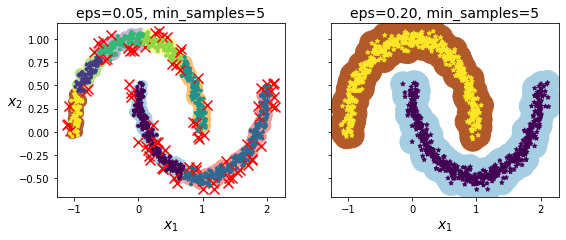

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()

El parámetro eps controla la distancia máxima a la que dos puntos pueden considerarse vecinos. Si eps es demasiado pequeño, es posible que algunos puntos no tengan suficientes vecinos cercanos para formar un cluster, lo que puede dar lugar a más colores de los esperados. Si eps es demasiado grande, todos los puntos pueden pertenecer a un único cluster, lo que resultaría en un solo color en el gráfico.

Respecto a la gráfica izquierda de la figura.
- Como podemos ver, el algoritmo identificó bastantes anomalías, además de 7 grupos diferentes. **¡Que decepcionante!**.

Afortunadamente, si **ampliamos el vecindario de cada instancia** al aumentar $\epsilon$ a 0.2, obtenemos el agrupamiento a la derecha, que se ve perfecto. Continuemos con este modelo.

Sorprendentemente, la clase **DBSCAN** no tiene un método *predict_()*, aunque tiene un método *fit_predict_()*. En otras palabras, no puede predecir a qué clúster pertenece una nueva instancia. La razón de esta decisión es que hay varias formas de predecir a qué clúster pertenece una nueva instancia, y es bastante fácil entrenar uno, por ejemplo, un clasificador K-NN:

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
# dbscan.components_ devuelve un array con los datos de los nucleos
# dbscan.labels_ es un arreglo de las etiquetas de cada instancia
# mientras que dbscan.core_sample_indices_ es un arreglo que contiene los índices de las instancias que son núcleos
# Al usar dbscan.core_sample_indices_ como índices para dbscan.labels_, se obtienen las etiquetas de los núcleos.
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

- Ahora, dadas algunas instancias nuevas, **podemos predecir a qué grupo probablemente pertenecerán**, e incluso **estimar una probabilidad para cada grupo**.
- Tengamos en cuenta que solo los entrenamos en las instancias centrales, pero también podríamos haber optado por usar **todas las instancias**, o **todas menos las anomalías**: esta elección depende de la tarea final.

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

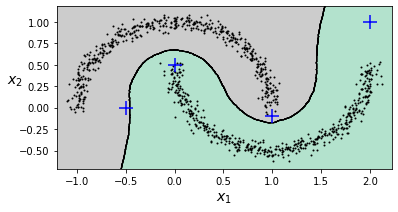

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_plot")
plt.show()

El límite de decisión se representa en la Figura anterior:
- Las cruces representan las 4 instancias en *X_new*.
- Tengamos en cuenta que, dado que no hay ninguna anomalía en el conjunto de entrenamiento del KNN, **el clasificador siempre elige un grupo, incluso cuando ese grupo está muy lejos**. Recordemos que la ausencia de anomalías en el conjunto de entrenamiento del KNN se debe a que estas instancias se consideraron como ruido en el proceso de agrupamiento con DBSCAN, por lo que no se utilizaron para entrenar el KNN.

Sin embargo, es bastante sencillo introducir una *distancia máxima*, en cuyo caso **las dos instancias que están lejos de ambos grupos se clasifican como anomalías**. Para hacer esto, podemos usar el método de los *kneighbors()* del **KNeighsClassifier**: dado un conjunto de instancias, devuelve las distancias y los índices de los $k$ vecinos más cercanos en el conjunto de entrenamiento (dos matrices, cada una con $k$ columnas):

linea [1]:

La variable y_dist es un array numpy que contiene las distancias euclidianas de los n_neighbors puntos más cercanos a cada punto de entrada en X_new.

Por otro lado, y_pred_idx es un array numpy que contiene las etiquetas (índices) de los puntos más cercanos a cada punto de entrada en X_new.

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
# y_pred_idx es una matriz que contiene los índices de los núcleos más cercanos a cada una de las nuevas instancias que se desean clasificar.
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
# aplasta el array, concatenando todos los elementos en una sola fila.
y_pred.ravel()

array([-1,  0,  1, -1])